In [1]:
import numpy as npp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('D:/programming tools/DATA SET/titanic')

In [3]:
titanic_train=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

# preparation of train data

In [4]:
titanic_train[:8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [5]:
dummy1=pd.get_dummies(titanic_train['Sex'])
dummy1[:5]

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [6]:
titanic_train=pd.concat([titanic_train,dummy1],axis=1)

In [7]:
titanic_train=titanic_train.drop(['Cabin','Sex','Embarked','Fare','Ticket','Name','PassengerId'],axis=1)

In [8]:
# to fill the values of Nan in Age column by median(28.00) of Age column 
titanic_train.Age=titanic_train.Age.fillna(titanic_train.Age.median())
titanic_train['Age'].isna().value_counts()

False    891
Name: Age, dtype: int64

In [9]:
titanic_train[:5]

,Survived,Pclass,Age,SibSp,Parch,female,male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [10]:
titanic_train_y=titanic_train['Survived']
titanic_train_x=titanic_train.drop(['Survived'],axis=1)
titanic_train_x[:5]

,Pclass,Age,SibSp,Parch,female,male
0,3,22.0,1,0,0,1
1,1,38.0,1,0,1,0
2,3,26.0,0,0,1,0
3,1,35.0,1,0,1,0
4,3,35.0,0,0,0,1


# now preparaton of test data

In [11]:
titanic_test[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [12]:
titanic_test.Age=titanic_test.Age.fillna(titanic_test.Age.median())
titanic_test['Age'].isna().value_counts()

False    418
Name: Age, dtype: int64

In [13]:
dummy2=pd.get_dummies(titanic_test['Sex'])

In [14]:
titanic_test=pd.concat([titanic_test,dummy2],axis=1)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,0


In [15]:
titanic_test_x=titanic_test.drop(['PassengerId','Name','Sex','Ticket','Fare','Cabin','Embarked','Survived'],axis=1)
titanic_test_y=titanic_test['Survived']

In [16]:
titanic_test_x.Age.isna().value_counts()

False    418
Name: Age, dtype: int64

# learning of the model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lgr=LogisticRegression() #paranthesis is imp after LogisticRegression

In [19]:
# titanic_model=logisticregression
titanic_model=lgr.fit(titanic_train_x,titanic_train_y)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
titanic_predict=titanic_model.predict(titanic_test_x) #it stored the values in array
#this is our predicted model 

In [21]:
titanic_test_model=pd.DataFrame(titanic_test_y) #it has predicted values of test data to show our model is how good

In [22]:
titanic_test_model['Predicted_surv']=titanic_predict # it assign the predicted data in test model for evalution
titanic_test_model[:5]

,Survived,Predicted_surv
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1


In [23]:
score_test=titanic_model.score(titanic_test_x,titanic_test_y)
score_test

0.9473684210526315

In [24]:
score_train=titanic_model.score(titanic_train_x,titanic_train_y)
score_train

0.792368125701459

In [25]:
from sklearn import metrics

In [26]:
conf_met=metrics.confusion_matrix(titanic_test_y,titanic_predict)
conf_met

array([[253,  13],
       [  9, 143]], dtype=int64)

Text(0.5, 48.29999999999998, 'Predicted Result')

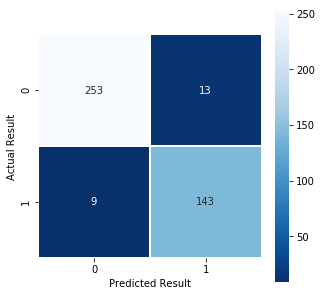

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_met,annot=True,fmt='.0f',linewidth=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')


# analysis of data

In [28]:
titanic_test_x[:5]

,Pclass,Age,SibSp,Parch,female,male
0,3,34.5,0,0,0,1
1,3,47.0,1,0,1,0
2,2,62.0,0,0,0,1
3,3,27.0,0,0,0,1
4,3,22.0,1,1,1,0


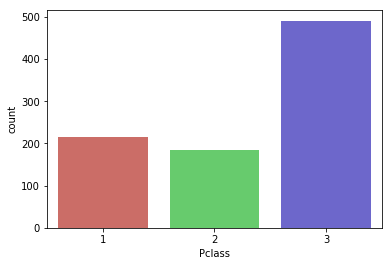

In [29]:
sns.countplot(x='Pclass',data=titanic_train,palette='hls')